NoteBook1.

En este notebook se realizarán las siguientes tareas:

1. Leer el archivo stroke.csv
2. Seleccionar aleatoriamente el 80% del conjunto de datos para entrenar y el 20% restante para las pruebas
3. Utilizar una estrategia para normalizar los datos y llenar los datos faltantes
4. Construir 5 redes neuronales variando en la topología de la red la cantidad de capas ocultas y de neuronas
por cada capa oculta. Puede también variar los hiperparámetros solver y la función de activación. En todas
las pruebas debe usar un random_state=123. Incluya en el notebook una tabla a manera de resumen con el
accuracy obtenido en cada caso y también las matrices de confusión
5. Indique en el notebook usando una celda de tipo Markdown los hiperparámetros que por el momento le permiten obtener la red con mayor accuracy
6. Seleccione uno de los hiperparámetros disponibles en la documentación (https://scikitlearn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) que sea diferente al
solver, a la función de activación, y al random_state. Realice dos variaciones en el hiperparámetro
seleccionado manteniendo los otros hiperparámetros del punto anterior. Indique el accuracy obtenido al
modificar el hiperparámetro seleccionado y analice si la red mejora, empeora, o mantiene su exactitud.
Incluya en el notebook dicho análisis


#####################################################################

   Topologia  Precision   Matriz de Confusion
0         5   0.628571    [[88, 0], [52, 0]]
1        10   0.771429   [[80, 8], [24, 28]]
2    (5, 5)   0.628571    [[88, 0], [52, 0]]
3   (10, 5)   0.628571    [[88, 0], [52, 0]]
4  (10, 10)   0.792857  [[77, 11], [18, 34]] 

#####################################################################

 Mejor topología: (10, 10) 


 Hiperparámetros de la red con mayor precision: 


 Topología: (10, 10) 


 Solver: adam 


 Activación: logistic 


 Random state: 123 

#####################################################################

 Precision modificada 1: 0.7928571428571428 


 Precision modificada 2: 0.7857142857142857 

#####################################################################
Análisis de las variaciones en el hiperparámetro alpha 


 La red con la variación 1 mejora la precisión. 

#####################################################################


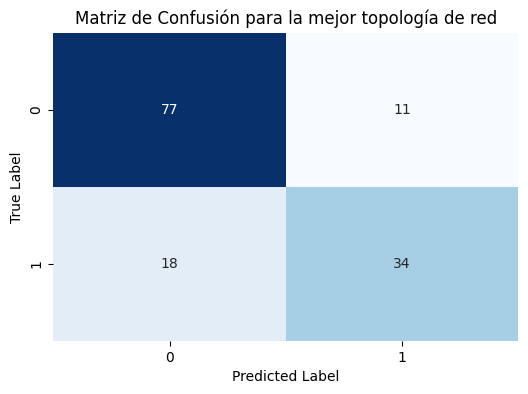

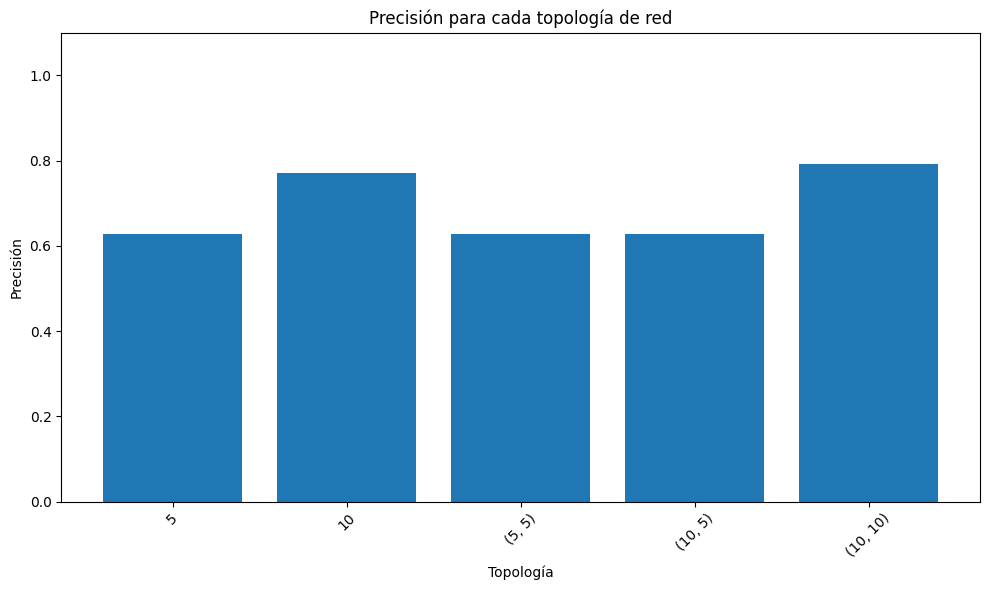

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
import warnings



#Ignorar las advertencias
warnings.filterwarnings("ignore")

# Paso 1: Leer el archivo stroke.csv
datos = pd.read_csv('stroke.csv')

# Paso 2: Seleccionar aleatoriamente el 80% del conjunto de datos para entrenar y el 20% restante para las pruebas
X_train, X_test, y_train, y_test = train_test_split(datos.drop('stroke', axis=1), datos['stroke'], test_size=0.2, random_state=123)

# Paso 3: llenar los datos faltantes y normalizar los datos
categoricas = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numericas = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Codificar variables categóricas usando LabelEncoder
label_encoder = LabelEncoder()
for categoria in categoricas:
    X_train[categoria] = label_encoder.fit_transform(X_train[categoria])
    X_test[categoria] = label_encoder.transform(X_test[categoria])

# Llenar los datos faltantes con la media usando SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train[numericas] = imputer.fit_transform(X_train[numericas])
X_test[numericas] = imputer.transform(X_test[numericas])

# Paso 4: Construir 5 redes neuronales variando la topología de la red y los hiperparámetros
topologias = [
    (5),  # Una capa oculta con 5 neuronas
    (10),  # Una capa oculta con 10 neuronas
    (5, 5),  # Dos capas ocultas con 5 neuronas cada una
    (10, 5),  # Dos capas ocultas con 10 y 5 neuronas respectivamente
    (10, 10),  # Dos capas ocultas con 10 neuronas cada una
]

resultados = []

for topologia in topologias:
    modelo = MLPClassifier(hidden_layer_sizes=topologia, solver='adam', activation='logistic', random_state=123)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    precision = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    resultados.append((topologia, precision, confusion))

# Mostrar los resultados en una tabla
table = pd.DataFrame(resultados, columns=['Topologia', 'Precision', 'Matriz de Confusion'])


print("#####################################################################")
print("\n",table,"\n")

# Obtener la topología con mayor presicion
mejor_topologia = max(resultados, key=lambda x: x[1])[0]
print("#####################################################################")
print("\n","Mejor topología:", mejor_topologia,"\n")

# Mostrar los hiperparámetros en una celda de tipo Markdown
print("\n","Hiperparámetros de la red con mayor precision:","\n")
print("\n","Topología:", mejor_topologia,"\n")
print("\n","Solver: adam","\n")
print("\n","Activación: logistic","\n")
print("\n","Random state: 123","\n")

# Seleccionar un hiperparámetro diferente y realizar dos variaciones
hiperparametro = 'alpha'

# Variación 1: Modificar el hiperparámetro seleccionado
modelo_modificado_1 = MLPClassifier(hidden_layer_sizes=mejor_topologia, solver='adam', activation='logistic', random_state=123, alpha=0.01)
modelo_modificado_1.fit(X_train, y_train)
y_pred_modified1 = modelo_modificado_1.predict(X_test)
precision_modificada_1 = accuracy_score(y_test, y_pred_modified1)

# Variación 2: Modificar el hiperparámetro seleccionado
modelo_modificado_2 = MLPClassifier(hidden_layer_sizes=mejor_topologia, solver='adam', activation='logistic', random_state=123, alpha=0.001)
modelo_modificado_2.fit(X_train, y_train)
y_pred_modified2 = modelo_modificado_2.predict(X_test)
precision_modificada_2 = accuracy_score(y_test, y_pred_modified2)

# Mostrar los resultados de las variaciones
print("#####################################################################")
print("\n","Precision modificada 1:", precision_modificada_1,"\n")
print("\n","Precision modificada 2:", precision_modificada_2,"\n")

# Análisis de las variaciones en el hiperparámetro seleccionado
print("#####################################################################")
print("Análisis de las variaciones en el hiperparámetro", hiperparametro,"\n")
if precision_modificada_1 > precision_modificada_2:
    print("\n","La red con la variación 1 mejora la precisión.","\n")
elif precision_modificada_1 < precision_modificada_2:
    print("\n","La red con la variación 1 empeora la precisión.","\n")
else:
    print("\n","La red con la variación 1 mantiene la misma precisión que la variación 2.","\n")

print("#####################################################################")

# Graficar matriz de confusion
mejor_confusion = max(resultados, key=lambda x: x[1])[2]
plt.figure(figsize=(6, 4))
sns.heatmap(mejor_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión para la mejor topología de red')
plt.show()

# Graficar la tabla de resultados
plt.figure(figsize=(10, 6))
plt.bar(range(len(table)), table['Precision'], tick_label=table['Topologia'])
plt.xlabel('Topología')
plt.ylabel('Precisión')
plt.title('Precisión para cada topología de red')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Los hiperparámetros que nos permiten obtener la red con mayor precisión son:

Topología: (10, 10)
Solver: adam
Activación: logistic
Random state: 123

Se modifica el hiperparámetro 'alpha' alphafloat, default=0.0001
Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.

Se modifica en la precision modificada 1 a: 0.01
Se modifica en la precision modificada 2 a: 0.001

Al finalizar la mejor precisión fue con el 'alpha'=0.01